# B compared to Logic Programming


Important differences:
* B is based on classical predicate logic with classical negation
* B is based on arithmetic and set theory, LP on (rational) trees aka uninterpreted functions
* B is strongly typed, but allows higher-order data types
* B allows arbitrary nesting of quantifiers and negation

As B is based on classical negation and classical predicate logic (without induction), how can it deal with natural numbers, transitive closure, ...?
* Integer arithmetic is built-in, providing induction through the back door. One can construct bijections between user-defined sets and the integers or natural numbers.
* Transitive closure is built-in, providing another way to introduce induction or recursion.


## Append in B

The logic program
```
append([],L,L) <-
append([H|X],Y,[H|Z]) <- append(X,Y,Z)
```
can be encoded in various ways in B.

### Built-in Sequence Operator

B has built-in sequences, which are special cases of functions, which are special cases of relations, which are sets of pairs.

The sequence [4,5,6] is represented by the relation {(1,4),(2,5),(3,6)}:


In [2]:
[4,5,6] = {(1,4),(2,5),(3,6)}

$\mathit{TRUE}$

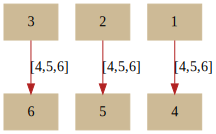

In [38]:
:dot expr_as_graph [4,5,6]

The built-in concatenation operator can be used to append sequences:

In [1]:
[1,2,3] ^ [4,5,6]

$[1,2,3,4,5,6]$

In [4]:
[1,2,3] ^ x = [1,2,3,4,5,6]

$\mathit{TRUE}$

**Solution:**
* $\mathit{x} = [4,5,6]$

In [6]:
:table {x,y | x^y = [1,2,3]}

|x|y|
|---|---|
|$\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$|$[1,2,3]$|
|$\{(1\mapsto 1)\}$|$\{(1\mapsto 2),(2\mapsto 3)\}$|
|$\{(1\mapsto 1),(2\mapsto 2)\}$|$\{(1\mapsto 3)\}$|
|$[1,2,3]$|$\emptyset$|


One can also write the append as a B function. Note that B is strongly typed (and user defined functions cannot yet be polymorphic), hence we have to provide the type for the arguments to the function.

In [12]:
app = %(x,y).(x:seq(INTEGER) & y:seq(INTEGER) | x \/ {i,e | (i-size(x),e) : y}) & app([1,2],[3,4]) = res

$\newcommand{\qdot}{\mathord{\mkern1mu\cdot\mkern1mu}}\newcommand{\bunion}{\mathbin{\mkern1mu\cup\mkern1mu}}\mathit{TRUE}$

**Solution:**
* $\mathit{app} = \lambda(\mathit{x},\mathit{y})\qdot(\mathit{x} \in \mathit{seq}(\mathit{INTEGER}) \land \mathit{y} \in \mathit{seq}(\mathit{INTEGER})\mid \mathit{x} \bunion \{\mathit{i},\mathit{e}\mid \mathit{i} - \mathit{size}(\mathit{x}) \mapsto \mathit{e} \in \mathit{y}\})$
* $\mathit{res} = [1,2,3,4]$

## Recursion using transitive closure

Given an operator TP from sets to sets, one can compute the transitive closure
using ```closure(TP)```. Together with the relational image operator ```.[.]``` one can
compute the least fixed point containing a starting set S 
(given the well known conditions) using ```closure(TP)[S]```.

To simplify the presentation, we encode a variation of append, working on sets:
```
set_app({},L,L) <-
set_app({H}\/X],Y,{H}\/Z) <- set_app(X,Y,Z)
```

In [32]:
TYPE = BOOL & HB = POW(TYPE)*POW(TYPE)*POW(TYPE)
&
Facts = UNION(L).(L:TYPE|{({L}-{L},{L},{L})})   // The set of all Facts
&
tp = /*@symbolic*/ {S,TPS|S:HB & #(x,y,z,h).( (x,y,z) = S & h:TYPE & TPS= (x\/{h},y,z\/{h}))} // The TP Operator
&
LHM = closure(tp)[Facts] // the least Herbrand model

$\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\qdot}{\mathord{\mkern1mu\cdot\mkern1mu}}\newcommand{\bunion}{\mathbin{\mkern1mu\cup\mkern1mu}}\newcommand{\bunion}{\mathbin{\mkern1mu\cup\mkern1mu}}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\mathit{TRUE}$

**Solution:**
* $\mathit{LHM} = \{((\emptyset\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\emptyset\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\}),((\{\mathit{FALSE}\}\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\{\mathit{FALSE}\}\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{FALSE},\mathit{TRUE}\}\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{FALSE},\mathit{TRUE}\}\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{TRUE}\}\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{TRUE}\}\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\})\}$
* $\mathit{HB} = ((\pow(\{\mathit{FALSE},\mathit{TRUE}\}) * \pow(\{\mathit{FALSE},\mathit{TRUE}\})) * \pow(\{\mathit{FALSE},\mathit{TRUE}\}))$
* $\mathit{tp} = \{\mathit{S},\mathit{TPS}\mid \mathit{S} \in ((\pow(\{\mathit{FALSE},\mathit{TRUE}\}) * \pow(\{\mathit{FALSE},\mathit{TRUE}\})) * \pow(\{\mathit{FALSE},\mathit{TRUE}\})) \land \exists(\mathit{x},\mathit{y},\mathit{z},\mathit{h})\qdot(\mathit{x} \mapsto \mathit{y} \mapsto \mathit{z} = \mathit{S} \land \mathit{h} \in \{\mathit{FALSE},\mathit{TRUE}\} \land \mathit{TPS} = (\mathit{x} \bunion \{\mathit{h}\}) \mapsto \mathit{y} \mapsto (\mathit{z} \bunion \{\mathit{h}\}))\}$
* $\mathit{TYPE} = \{\mathit{FALSE},\mathit{TRUE}\}$
* $\mathit{Facts} = \{((\emptyset\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\emptyset\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\})\}$

### Axiomatic Encoding using logical implication


In [34]:
TYPE = BOOL & HB = POW(TYPE)*POW(TYPE)*POW(TYPE)
&
Facts = UNION(L).(L:TYPE|{({L}-{L},{L},{L})})   // The set of all Facts
&
Facts <: Model
&
!(x,y,z).( (x,y,z):Model => !h.(h:TYPE => (x\/{h},y,z\/{h}):Model))

$\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\mathit{TRUE}$

**Solution:**
* $\mathit{Model} = \{((\emptyset\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\}),((\emptyset\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\{\mathit{FALSE}\}\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{TRUE}\}\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\}),((\{\mathit{FALSE}\}\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\{\mathit{TRUE}\}\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{FALSE},\mathit{TRUE}\}\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\}),((\{\mathit{FALSE},\mathit{TRUE}\}\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE},\mathit{TRUE}\})\}$
* $\mathit{HB} = ((\pow(\{\mathit{FALSE},\mathit{TRUE}\}) * \pow(\{\mathit{FALSE},\mathit{TRUE}\})) * \pow(\{\mathit{FALSE},\mathit{TRUE}\}))$
* $\mathit{TYPE} = \{\mathit{FALSE},\mathit{TRUE}\}$
* $\mathit{Facts} = \{((\emptyset\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\emptyset\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\})\}$

In [36]:
TYPE = BOOL & HB = POW(TYPE)*POW(TYPE)*POW(TYPE)
&
Facts = UNION(L).(L:TYPE|{({L}-{L},{L},{L})})   // The set of all Facts
&
Facts <: Model
&
!(x,y,z).( (x,y,z):Model => !h.(h:TYPE => (x\/{h},y,z\/{h}):Model))
&
Model = HB

$\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\newcommand{\pow}{\mathop{\mathbb P\hbox{}}\nolimits}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\mathit{TRUE}$

**Solution:**
* $\mathit{Model} = ((\pow(\{\mathit{FALSE},\mathit{TRUE}\}) * \pow(\{\mathit{FALSE},\mathit{TRUE}\})) * \pow(\{\mathit{FALSE},\mathit{TRUE}\}))$
* $\mathit{HB} = ((\pow(\{\mathit{FALSE},\mathit{TRUE}\}) * \pow(\{\mathit{FALSE},\mathit{TRUE}\})) * \pow(\{\mathit{FALSE},\mathit{TRUE}\}))$
* $\mathit{TYPE} = \{\mathit{FALSE},\mathit{TRUE}\}$
* $\mathit{Facts} = \{((\emptyset\mapsto\{\mathit{FALSE}\})\mapsto\{\mathit{FALSE}\}),((\emptyset\mapsto\{\mathit{TRUE}\})\mapsto\{\mathit{TRUE}\})\}$

### Additional Material

In [35]:
TYPE = BOOL & HB = POW(TYPE)*POW(TYPE)*POW(TYPE)
&
Facts = UNION(L).(L:TYPE|{({L}-{L},{L},{L})})   // The set of all Facts
&
AllModels = {Model | Facts <: Model &
                     !(x,y,z).( (x,y,z):Model => !h.(h:TYPE => (x\/{h},y,z\/{h}):Model))}

$\mathit{time\_out}$